In [4]:
import mne
from mne.channels import make_standard_montage
import os
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import cm #colormap
from matplotlib.colors import Normalize
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import pandas as pd
import random
from collections import Counter

#### Initilizing some general variables

In [42]:
# Define the number of participants, trials per participant, stimuli, and conditions
participants = ['P01', 'P04', 'P05', 'P06', 'P07', 'P09', 'P11', 'P12', 'P13', 'P14']
trials_per_participant = 60
num_trials_per_stimulus = 5
stimuli = [1, 2, 3, 4, 11, 12, 13, 14, 21, 22, 23, 24]
conditions = ['Perception', 'Imagination_1', 'Imagination_2', 'Imagination_3']

Plot successfully imagined stimuli per participant

     14   24   34   44   114  124  134  144  214  224  234  244
P01    5    5    5    5    5    5    5    5  5.0  5.0    5  5.0
P04    5    5    5    5    5    5    5    5  0.0  5.0    5  4.0
P06    5    5    5    5    5    5    5    5  4.0  5.0    3  5.0
P07    5    5    5    5    5    5    4    4  4.0  2.0    4  4.0
P09    5    5    5    5    5    5    3    5  0.0  2.0    5  0.0
P11    5    5    5    5    4    3    4    4  2.0  5.0    5  5.0
P12    5    5    5    5    3    5    5    5  2.0  5.0    5  2.0
P13    5    5    5    5    5    5    5    5  5.0  5.0    5  5.0
P14    4    5    4    5    5    5    2    2  2.0  0.0    5  2.0


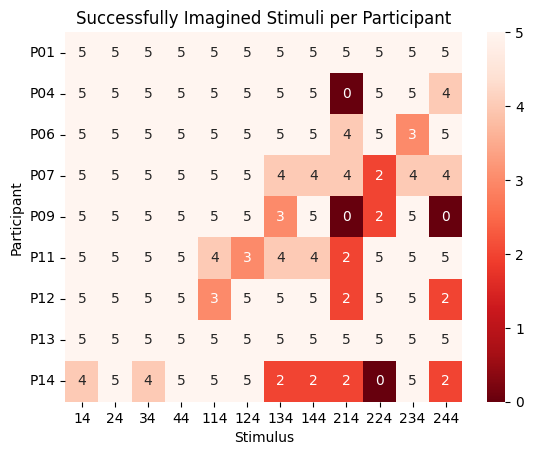

In [43]:

num_events_per_part = [180,174,177,172,165,172,172,180,161]
P01 = Counter({122: 5, 123: 5, 32: 5, 33: 5, 232: 5, 233: 5, 132: 5, 133: 5, 142: 5, 143: 5, 112: 5, 113: 5, 12: 5, 13: 5, 22: 5, 23: 5, 42: 5, 43: 5, 212: 5, 213: 5, 222: 5, 223: 5, 242: 5, 243: 5, 144: 5, 214: 5, 244: 5, 24: 5, 224: 5, 34: 5, 134: 5, 44: 5, 14: 5, 234: 5, 114: 5, 124: 5})
P04 = Counter({122: 5, 123: 5, 32: 5, 33: 5, 232: 5, 233: 5, 132: 5, 133: 5, 142: 5, 143: 5, 112: 5, 113: 5, 12: 5, 13: 5, 22: 5, 23: 5, 42: 5, 43: 5, 212: 5, 213: 5, 222: 5, 223: 5, 242: 5, 243: 5, 144: 5, 24: 5, 224: 5, 34: 5, 134: 5, 44: 5, 14: 5, 234: 5, 114: 5, 124: 5, 244: 4})
P06 = Counter({122: 5, 123: 5, 32: 5, 33: 5, 232: 5, 233: 5, 132: 5, 133: 5, 142: 5, 143: 5, 112: 5, 113: 5, 12: 5, 13: 5, 22: 5, 23: 5, 42: 5, 43: 5, 212: 5, 213: 5, 222: 5, 223: 5, 242: 5, 243: 5, 144: 5, 244: 5, 24: 5, 224: 5, 34: 5, 134: 5, 44: 5, 14: 5, 114: 5, 124: 5, 214: 4, 234: 3})
P07 = Counter({122: 5, 123: 5, 32: 5, 33: 5, 232: 5, 233: 5, 132: 5, 133: 5, 142: 5, 143: 5, 112: 5, 113: 5, 12: 5, 13: 5, 22: 5, 23: 5, 42: 5, 43: 5, 212: 5, 213: 5, 222: 5, 223: 5, 242: 5, 243: 5, 24: 5, 34: 5, 44: 5, 14: 5, 114: 5, 124: 5, 214: 4, 244: 4, 144: 4, 234: 4, 134: 4, 224: 2})
P09 = Counter({122: 5, 123: 5, 32: 5, 33: 5, 232: 5, 233: 5, 132: 5, 133: 5, 142: 5, 143: 5, 112: 5, 113: 5, 12: 5, 13: 5, 22: 5, 23: 5, 42: 5, 43: 5, 212: 5, 213: 5, 222: 5, 223: 5, 242: 5, 243: 5, 144: 5, 24: 5, 34: 5, 44: 5, 14: 5, 234: 5, 114: 5, 124: 5, 134: 3, 224: 2})
P11 = Counter({122: 5, 123: 5, 32: 5, 33: 5, 232: 5, 233: 5, 132: 5, 133: 5, 142: 5, 143: 5, 112: 5, 113: 5, 12: 5, 13: 5, 22: 5, 23: 5, 42: 5, 43: 5, 212: 5, 213: 5, 222: 5, 223: 5, 242: 5, 243: 5, 244: 5, 24: 5, 224: 5, 34: 5, 44: 5, 14: 5, 234: 5, 144: 4, 114: 4, 134: 4, 124: 3, 214: 2})
P12 = Counter({122: 5, 123: 5, 32: 5, 33: 5, 232: 5, 233: 5, 132: 5, 133: 5, 142: 5, 143: 5, 112: 5, 113: 5, 12: 5, 13: 5, 22: 5, 23: 5, 42: 5, 43: 5, 212: 5, 213: 5, 222: 5, 223: 5, 242: 5, 243: 5, 144: 5, 24: 5, 224: 5, 34: 5, 134: 5, 44: 5, 14: 5, 234: 5, 124: 5, 114: 3, 214: 2, 244: 2})
P13 = Counter({122: 5, 123: 5, 32: 5, 33: 5, 232: 5, 233: 5, 132: 5, 133: 5, 142: 5, 143: 5, 112: 5, 113: 5, 12: 5, 13: 5, 22: 5, 23: 5, 42: 5, 43: 5, 212: 5, 213: 5, 222: 5, 223: 5, 242: 5, 243: 5, 144: 5, 214: 5, 244: 5, 24: 5, 224: 5, 34: 5, 134: 5, 44: 5, 14: 5, 234: 5, 114: 5, 124: 5})
P14 = Counter({122: 5, 123: 5, 32: 5, 33: 5, 232: 5, 233: 5, 132: 5, 133: 5, 142: 5, 143: 5, 112: 5, 113: 5, 12: 5, 13: 5, 22: 5, 23: 5, 42: 5, 43: 5, 212: 5, 213: 5, 222: 5, 223: 5, 242: 5, 243: 5, 24: 5, 44: 5, 234: 5, 114: 5, 124: 5, 34: 4, 14: 4, 214: 2, 144: 2, 244: 2, 134: 2})

ps = [P01,P04,P06,P07,P09,P11,P12,P13,P14]
 
data = []
for p in ps:
    filtered_counter = Counter({key: value for key, value in p.items() if str(key)[-1] == '4'})
    data.append(filtered_counter)

df = pd.DataFrame(data)
df.fillna(0, inplace=True)

df.index = ['P01', 'P04', 'P06', 'P07', 'P09', 'P11', 'P12', 'P13', 'P14']

df = df.reindex(sorted(df.columns), axis=1)
print(df)

sns.heatmap(df, annot=True, cmap="Reds_r")
plt.xlabel('Stimulus')
plt.ylabel('Participant')
#changed rotation here, different version in overleaf
plt.yticks(rotation=0)
plt.title("Successfully Imagined Stimuli per Participant")
plt.show()
#also might want to get rid of condition and just keep song id as all conditions are 4 anyway

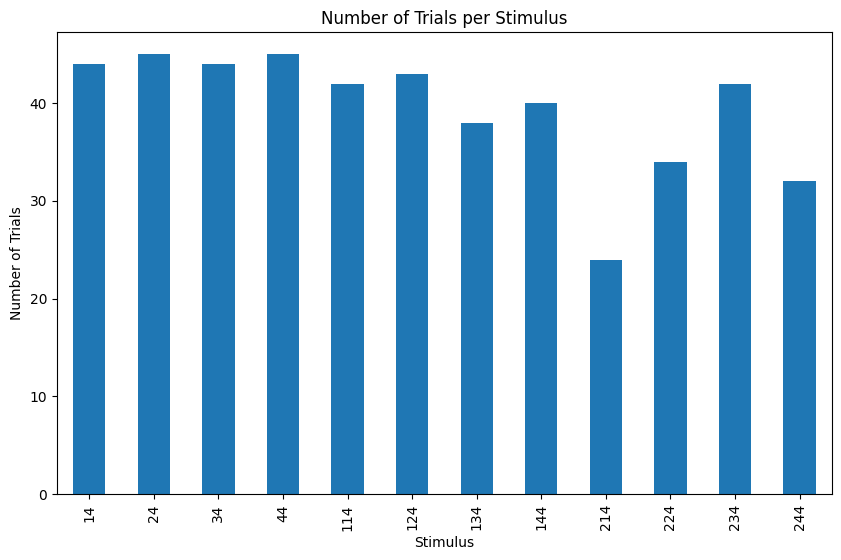

In [44]:
sum_per_stimulus = df.sum(axis=0)
sum = sum_per_stimulus.reindex(sorted(df.columns), axis=1)
plt.figure(figsize=(10, 6))
sum.plot(kind='bar')
plt.title('Number of Trials per Stimulus')
plt.xlabel('Stimulus')
plt.ylabel('Number of Trials')
plt.show()

#this looks wrong, correct version is saved locally


/tmp/ipykernel_87078/3656388924.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds_r')


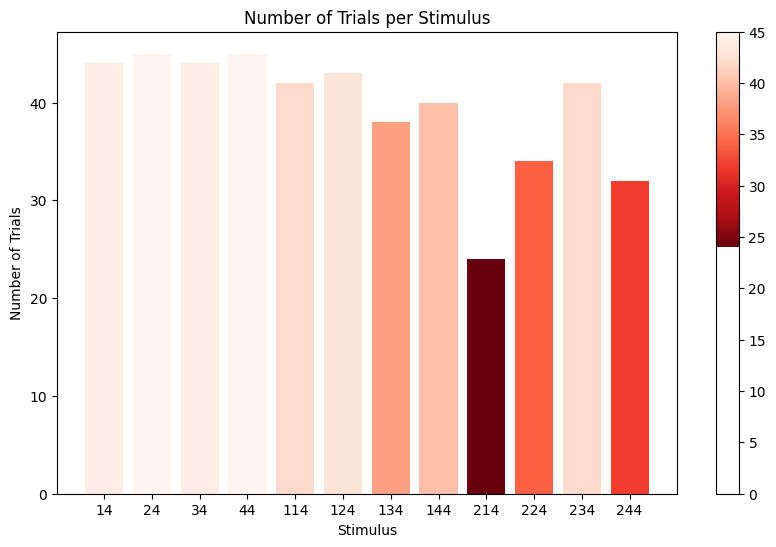

In [45]:
sum_per_stimulus = sum_per_stimulus.reindex(sorted(df.columns))

# Create a colormap
cmap = cm.get_cmap('Reds_r')

# Normalize the values to range between 0 and 1
normalized_values = (sum_per_stimulus - sum_per_stimulus.min()) / (sum_per_stimulus.max() - sum_per_stimulus.min())

# Plot the data
plt.figure(figsize=(10, 6))

bars = plt.bar(range(len(sum_per_stimulus)), sum_per_stimulus.values, color=cmap(normalized_values))

# Add color bar for reference
sm = plt.cm.ScalarMappable(cmap=cmap, norm=Normalize(vmin=sum_per_stimulus.min(), vmax=sum_per_stimulus.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())

plt.title('Number of Trials per Stimulus')
plt.xlabel('Stimulus')
plt.ylabel('Number of Trials')
plt.xticks(range(len(sum_per_stimulus)), sum_per_stimulus.index)
cbar.set_ticks(np.linspace(0, sum_per_stimulus.max(), num=10))
plt.show()

/tmp/ipykernel_87078/4245655831.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_coolwarm = cm.get_cmap('coolwarm')


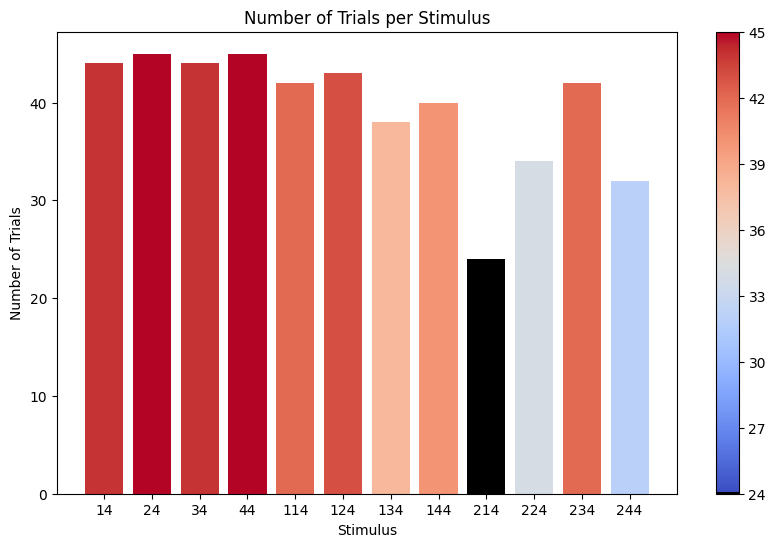

In [46]:
# Assuming sum_per_stimulus is your Series
sum_per_stimulus = sum_per_stimulus.reindex(sorted(df.columns))

# Create a colormap that starts from black and smoothly transitions into 'coolwarm'
cmap_coolwarm = cm.get_cmap('coolwarm')
colors = [(0, 0, 0)] + [cmap_coolwarm(i) for i in range(1, cmap_coolwarm.N)]
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)

# Normalize the values to range between 0 and 1
normalized_values = (sum_per_stimulus - sum_per_stimulus.min()) / (sum_per_stimulus.max() - sum_per_stimulus.min())

# Plot the data
plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(sum_per_stimulus)), sum_per_stimulus.values, color=custom_cmap(normalized_values))

# Add color bar for reference
sm = plt.cm.ScalarMappable(cmap=custom_cmap, norm=Normalize(vmin=sum_per_stimulus.min(), vmax=sum_per_stimulus.max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca())

# Customize colorbar tick labels
cbar.set_ticks(np.linspace(sum_per_stimulus.min(), sum_per_stimulus.max(), num=8))

plt.title('Number of Trials per Stimulus')
plt.xlabel('Stimulus')
plt.ylabel('Number of Trials')
plt.xticks(range(len(sum_per_stimulus)), sum_per_stimulus.index)

plt.show()

### Topomap of biosemi64 montage

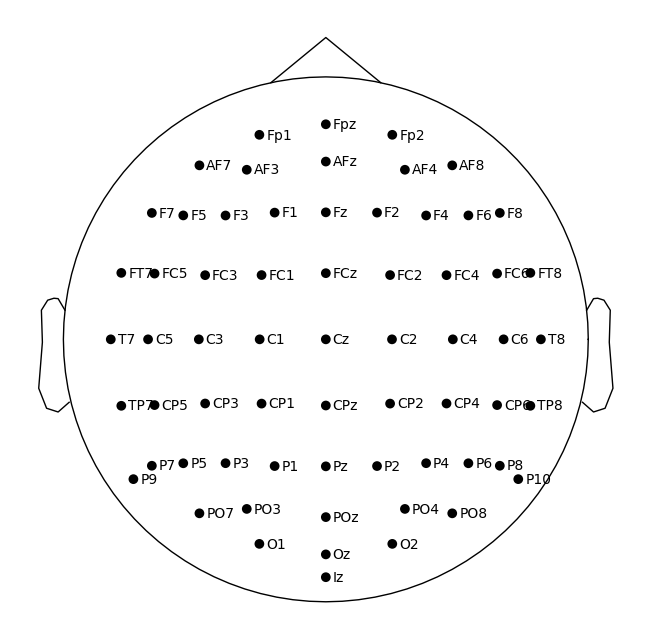

In [47]:
montage = make_standard_montage('biosemi64')
montage.plot();

### Reading raw data of participant 1 as example

In [48]:
raw = mne.io.read_raw_fif('../../../Thesis/openmiir/raw_data/P01-raw.fif', preload = True)
raw.info

Opening raw data file ../../../Thesis/openmiir/raw_data/P01-raw.fif...
Isotrak not found
    Read a total of 1 projection items:
        Average EEG reference (1 x 64)  idle
    Range : 0 ... 2478165 =      0.000 ...  4840.166 secs
Ready.
Reading 0 ... 2478165  =      0.000 ...  4840.166 secs...


Measurement date,"January 28, 2015 17:39:57 GMT"
Experimenter,Unknown
Participant,Unknown
Digitized points,Not available
Good channels,"61 EEG, 4 EOG, 1 Stimulus"
Bad channels,"P8, P10, T8"
EOG channels,"EXG1, EXG2, EXG3, EXG4"
ECG channels,Not available
Sampling frequency,512.00 Hz
Highpass,0.00 Hz
Lowpass,104.00 Hz


#### Plot sensors of raw data

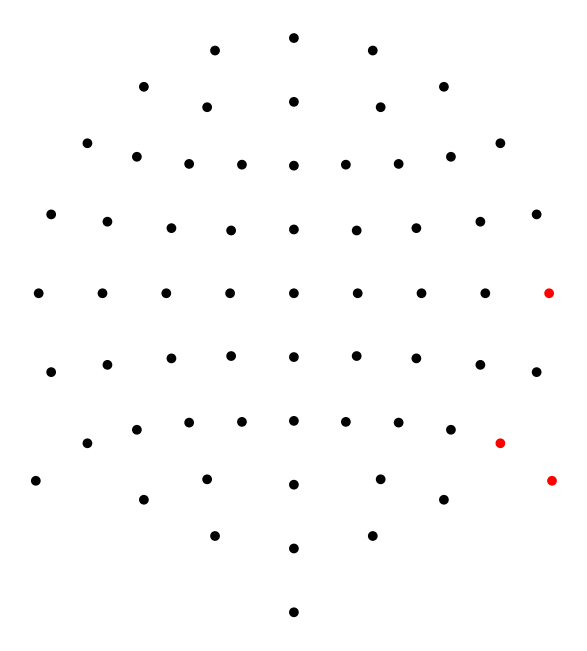

In [49]:
raw.plot_sensors();

In [50]:



# Create a list to store the data
data = []

# Generate the data for each participant, stimuli, and condition
# Create a list to store the data
data = []

# Generate the data for each participant, stimulus, and condition
for participant in participants:
    for stimulus in stimuli:
        # Shuffle the conditions for each stimulus
        random_conditions = random.sample(conditions, len(conditions))
        for condition_idx, condition in enumerate(random_conditions):
            data.append([participant, stimulus, condition, num_trials_per_stimulus])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Participant', 'Stimulus_ID', 'Condition', 'Num_Trials'])

# Display the DataFrame
print(df)

# Group the DataFrame by Stimulus_ID and Condition and calculate the total number of trials
grouped_df = df.groupby(['Stimulus_ID', 'Condition']).sum().reset_index()

"""# Create a bar plot
plt.figure(figsize=(12, 6))
for idx, stimulus_id in enumerate(stimuli):
    plt.subplot(3, 4, idx+1)
    subset_df = grouped_df[grouped_df['Stimulus_ID'] == stimulus_id]
    conditions = subset_df['Condition']
    num_trials = subset_df['Num_Trials']
    plt.bar(conditions, num_trials, color='skyblue')
    plt.title(f'Stimulus {stimulus_id}')
    plt.xlabel('Condition')
    plt.ylabel('Number of Trials')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()"""

    Participant  Stimulus_ID      Condition  Num_Trials
0           P01            1  Imagination_1           5
1           P01            1  Imagination_2           5
2           P01            1     Perception           5
3           P01            1  Imagination_3           5
4           P01            2     Perception           5
..          ...          ...            ...         ...
475         P14           23  Imagination_3           5
476         P14           24  Imagination_1           5
477         P14           24     Perception           5
478         P14           24  Imagination_3           5
479         P14           24  Imagination_2           5

[480 rows x 4 columns]


"# Create a bar plot\nplt.figure(figsize=(12, 6))\nfor idx, stimulus_id in enumerate(stimuli):\n    plt.subplot(3, 4, idx+1)\n    subset_df = grouped_df[grouped_df['Stimulus_ID'] == stimulus_id]\n    conditions = subset_df['Condition']\n    num_trials = subset_df['Num_Trials']\n    plt.bar(conditions, num_trials, color='skyblue')\n    plt.title(f'Stimulus {stimulus_id}')\n    plt.xlabel('Condition')\n    plt.ylabel('Number of Trials')\n    plt.xticks(rotation=45)\nplt.tight_layout()\nplt.show()"

### Read preprocessed data of P01 as example

In [10]:
# read the preprocessed data to visualize psd for trials
from find_stimulus_length import get_start_and_end
file = "../../../Thesis/LONGER-EPOCHS-{}-preprocessed-precICA-raw.fif".format("P01")
raw_data = mne.io.read_raw_fif(file, preload = True)

events = mne.find_events(raw_data, stim_channel="STI 014")
stimulus_ids = events[:, -1]
print("stimulus_ids: ", sorted(set(stimulus_ids)))
eeg_picks = mne.pick_types(raw_data.info, meg=False, eeg=True, eog=False, stim=False, exclude=["EXG5", "EXG6"])
included_event_ids = [11,21,31,41,111,121,131,141,211,221,231,241] #perception only
filtered_events = []
for event in events:
    if event[-1] in included_event_ids:
        filtered_events.append(event)
labels = [event[2] for event in filtered_events]
counter = 1
for event in filtered_events:
    event = event.reshape(1,3)
    stimulus_id = event[0,2]
    
    song_id, condition_id = int(str(stimulus_id)[:-1]), int(str(stimulus_id)[-1]) #splitting stimulus id into song and condition
    #print("here: ", stimulus_id, song_id, condition_id)
    tmin, tmax = get_start_and_end(song_id, condition_id, "P14")#participant_id)
    #print("Length of song = ", tmax-tmin)

    #INDIVIDUAL LENGTHS
    epoch = mne.Epochs(raw_data, events=event, event_id=stimulus_id, tmin=tmin, tmax=tmax, #tmax=6.8709
    baseline=(None,None), verbose=False, picks=eeg_picks)

    plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch
    # 1 plot per epoch, this is a lot actually want average across trials. see below
    plot.savefig("./time-frequency-plots-P14/{}-{}-P14.png".format(counter, stimulus_id))
    counter += 1

Opening raw data file ../../../Thesis/LONGER-EPOCHS-P01-preprocessed-precICA-raw.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64)  idle
    Range : 0 ... 2478165 =      0.000 ...  4840.166 secs
Ready.
Reading 0 ... 2478165  =      0.000 ...  4840.166 secs...
360 events found on stim channel STI 014
Event IDs: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42
   43   44  111  112  113  114  121  122  123  124  131  132  133  134
  141  142  143  144  211  212  213  214  221  222  223  224  231  232
  233  234  241  242  243  244 1111 2001]
stimulus_ids:  [11, 12, 13, 14, 21, 22, 23, 24, 31, 32, 33, 34, 41, 42, 43, 44, 111, 112, 113, 114, 121, 122, 123, 124, 131, 132, 133, 134, 141, 142, 143, 144, 211, 212, 213, 214, 221, 222, 223, 224, 231, 232, 233, 234, 241, 242, 243, 244, 1111, 2001]
Using data from preloaded Raw for 1 events and 3981 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7

/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 4949 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 4730 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 4584 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 6267 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 6895 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 6818 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 3929 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 5952 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 4265 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 8194 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 3519 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 8194 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 5952 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 6895 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 3929 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 4265 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 4584 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 4949 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 4730 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 3981 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 3519 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 6818 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 6267 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 6267 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 8194 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 4730 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 3981 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 4265 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 5952 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 6895 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 6818 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 4584 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 4949 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 3929 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 3519 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 5952 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 4265 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 3929 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 3981 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 6895 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 4730 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 8194 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 3519 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 6818 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 4584 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 6267 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 4949 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 4584 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 3981 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 3519 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 4949 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 8194 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 6267 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 4730 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 6895 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 5952 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 6818 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 3929 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


Using data from preloaded Raw for 1 events and 4265 original time points ...
0 bad epochs dropped
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/tmp/ipykernel_2382/2346242831.py:30: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  plot = epoch.compute_psd(fmin=0.5, fmax=30).plot() #epoch is exactly 1 epoch


### Time-frequency analysis

In [52]:
"""#time-frequency analysis
from mne.time_frequency import tfr_morlet

filtered_events = np.array([arr for arr in events if arr[2] in included_event_ids])

events_song_ids_only = np.array(np.array([[arr[0], arr[1], int(str(arr[2])[:-1])] for arr in filtered_events]))

print(set(events_song_ids_only[:,2]))

# plotting psd average of each stimulus
for stim in [1,2,3,4,11,12,13,14,21,22,23,24]:
    print("Plotting stim ", stim)
    #event_ids = [int(str(stim) + str(i)) for i in range(1, 5)]
    epochs = mne.Epochs(raw, events=events_song_ids_only, event_id=stim, tmin=0, tmax=15,
        baseline=(None,None), verbose=False, picks=eeg_picks)

    epochs.compute_psd(fmin=2.0, fmax=40.0).plot(
        average=True, amplitude=False, picks="data", exclude="bads")"""

'#time-frequency analysis\nfrom mne.time_frequency import tfr_morlet\n\nfiltered_events = np.array([arr for arr in events if arr[2] in included_event_ids])\n\nevents_song_ids_only = np.array(np.array([[arr[0], arr[1], int(str(arr[2])[:-1])] for arr in filtered_events]))\n\nprint(set(events_song_ids_only[:,2]))\n\n# plotting psd average of each stimulus\nfor stim in [1,2,3,4,11,12,13,14,21,22,23,24]:\n    print("Plotting stim ", stim)\n    #event_ids = [int(str(stim) + str(i)) for i in range(1, 5)]\n    epochs = mne.Epochs(raw, events=events_song_ids_only, event_id=stim, tmin=0, tmax=15,\n        baseline=(None,None), verbose=False, picks=eeg_picks)\n\n    epochs.compute_psd(fmin=2.0, fmax=40.0).plot(\n        average=True, amplitude=False, picks="data", exclude="bads")'

Plot average over 5 stimuli per condition - done on P01 as example
Uncomment last line to see plots (takes space)

In [53]:
import mne

# read the preprocessed data to visualize psd for trials
# only participant 1 for now 
from find_stimulus_length import get_start_and_end
file = "../../../Thesis/LONGER-EPOCHS-{}-preprocessed-precICA-raw.fif".format("P01")
raw_data = mne.io.read_raw_fif(file, preload=True)

events = mne.find_events(raw_data, stim_channel="STI 014")
stimulus_ids = events[:, -1]
print("stimulus_ids: ", sorted(set(stimulus_ids)))
eeg_picks = mne.pick_types(raw_data.info, meg=False, eeg=False, eog=False, stim=False, include = ["T8"], exclude=["EXG5", "EXG6"])
# eeg = True to include all channels
included_event_ids = [11, 21, 31, 41, 111, 121, 131, 141, 211, 221, 231, 241]  # perception only

# Create a dictionary to group stimulus IDs
grouped_stimulus_ids = {}

for stimulus_id in included_event_ids:
    # Group stimulus ID without the last digit
    group_id = stimulus_id // 10

    # Append current stimulus ID to the corresponding group
    if group_id not in grouped_stimulus_ids:
        grouped_stimulus_ids[group_id] = [stimulus_id]
    else:
        grouped_stimulus_ids[group_id].append(stimulus_id)

# Create a list to store all epochs
all_epochs = []

# Iterate over grouped stimulus IDs
for group_id, stimulus_ids in grouped_stimulus_ids.items():
    print("Group ID:", group_id, "Stimulus IDs:", stimulus_ids)

    group_events = [event for event in events if event[-1] in stimulus_ids]

    # Extract song and condition IDs from the first stimulus ID in the group
    song_id, condition_id = int(str(stimulus_ids[0])[:-1]), int(str(stimulus_ids[0])[-1])

    # Get start and end times based on song and condition IDs
    tmin, tmax = get_start_and_end(song_id, condition_id, "P01")  # participant_id

    print("Length of song:", tmax - tmin)

    # Create epochs for the current group of stimulus IDs
    epoch = mne.Epochs(raw_data, events=group_events, event_id=None, tmin=tmin, tmax=tmax,
                       baseline=(None, None), verbose=False, picks=eeg_picks)
    epoch = epoch.drop_bad(reject='existing', flat='existing', verbose=None)

    # Append epochs to the list
    all_epochs.append(epoch)

# Average epochs for each group of stimulus IDs
for group_id, epoch in zip(grouped_stimulus_ids.keys(), all_epochs):
    print("Group ID:", group_id)
    ############# UNCOMMENT NEXT LINE TO ACTUALLY MAKE PLOT ###############
    #epoch.average().plot()  # Plot the average epoch for each group of stimulus IDs

Opening raw data file ../../../Thesis/LONGER-EPOCHS-P01-preprocessed-precICA-raw.fif...
    Read a total of 1 projection items:
        Average EEG reference (1 x 64)  idle
    Range : 0 ... 2478165 =      0.000 ...  4840.166 secs
Ready.
Reading 0 ... 2478165  =      0.000 ...  4840.166 secs...


360 events found on stim channel STI 014
Event IDs: [  11   12   13   14   21   22   23   24   31   32   33   34   41   42
   43   44  111  112  113  114  121  122  123  124  131  132  133  134
  141  142  143  144  211  212  213  214  221  222  223  224  231  232
  233  234  241  242  243  244 1111 2001]
stimulus_ids:  [11, 12, 13, 14, 21, 22, 23, 24, 31, 32, 33, 34, 41, 42, 43, 44, 111, 112, 113, 114, 121, 122, 123, 124, 131, 132, 133, 134, 141, 142, 143, 144, 211, 212, 213, 214, 221, 222, 223, 224, 231, 232, 233, 234, 241, 242, 243, 244, 1111, 2001]
Group ID: 1 Stimulus IDs: [11]
Length of song: 14.9657
Using data from preloaded Raw for 5 events and 7663 original time points ...
0 bad epochs dropped
Group ID: 2 Stimulus IDs: [21]
Length of song: 9.5352
Using data from preloaded Raw for 5 events and 4883 original time points ...
0 bad epochs dropped
Group ID: 3 Stimulus IDs: [31]
Length of song: 11.9797
Using data from preloaded Raw for 5 events and 6135 original time points ...
0 ba

In [54]:
"""epochs11 = mne.Epochs(raw, events=filtered_events, event_id=11, tmin=0, tmax=15,
        baseline=(None,None), verbose=False, picks=eeg_picks)
x = epochs11.compute_tfr(method="morlet", freqs=np.array([1,20,50]))
print(x)
print(x[0])
x[0].plot();"""

'epochs11 = mne.Epochs(raw, events=filtered_events, event_id=11, tmin=0, tmax=15,\n        baseline=(None,None), verbose=False, picks=eeg_picks)\nx = epochs11.compute_tfr(method="morlet", freqs=np.array([1,20,50]))\nprint(x)\nprint(x[0])\nx[0].plot();'

### Confusion matrix of baseline + correct results of binary information

This is with test_size = 0.2/0.3(?) but also did leave-one-participant-out, then only 5 predictions per stimulus though

copy any results form results_in_txt here:)

In [55]:
cf = np.array([
    [0, 9, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0],
    [0, 13, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 14, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 13, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 5, 0, 0, 0, 0, 8, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 14, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 13, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 13, 0, 0, 0],
    [0, 0, 0, 0, 5, 0, 0, 0, 0, 8, 0, 0],
    [0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 14, 0, 0, 0, 0, 0]
])

# Create DataFrame
df = pd.DataFrame(data=cf, index=stimuli, columns=stimuli)
print(df)



 

    1   2   3   4   11  12  13  14  21  22  23  24
1    0   9   0   0   4   0   0   0   0   1   0   0
2    0  13   0   0   0   0   0   0   0   0   0   0
3    0   0   0  14   0   0   0   0   0   0   0   0
4    0   0   0  13   0   0   0   0   0   0   0   0
11   0   0   0   0   5   0   0   0   0   8   0   0
12   0   0   0   0   0   0   0   0  14   0   0   0
13   0   0   0   0   0   0  13   0   0   0   0   0
14   0   0   0   0   0   0  14   0   0   0   0   0
21   0   0   0   0   0   0   0   0  13   0   0   0
22   0   0   0   0   5   0   0   0   0   8   0   0
23   0   0   0   0   0   0  14   0   0   0   0   0
24   0   0   0   0   0   0  14   0   0   0   0   0


    1   2   3   4   11  12  13  14  21  22  23  24
1    0   9   0   0   4   0   0   0   0   1   0   0
2    0  13   0   0   0   0   0   0   0   0   0   0
3    0   0   0  14   0   0   0   0   0   0   0   0
4    0   0   0  13   0   0   0   0   0   0   0   0
11   0   0   0   0   5   0   0   0   0   8   0   0
12   0   0   0   0   0   0   0   0  14   0   0   0
13   0   0   0   0   0   0  13   0   0   0   0   0
14   0   0   0   0   0   0  14   0   0   0   0   0
21   0   0   0   0   0   0   0   0  13   0   0   0
22   0   0   0   0   5   0   0   0   0   8   0   0
23   0   0   0   0   0   0  14   0   0   0   0   0
24   0   0   0   0   0   0  14   0   0   0   0   0


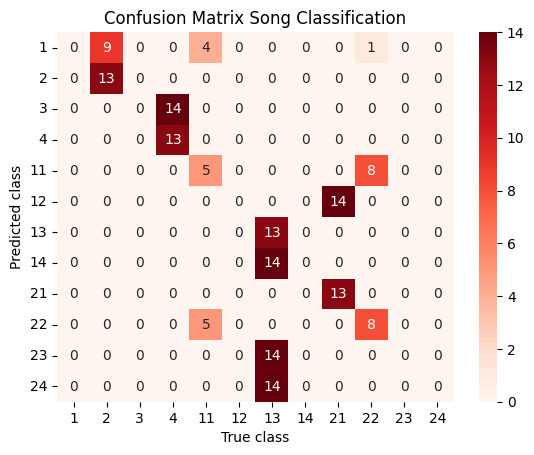

In [56]:
indices = [1, 2, 3, 4, 11, 12, 13, 14, 21, 22, 23, 24]
columns = indices

# Create DataFrame
df = pd.DataFrame(data=cf, index=indices, columns=columns)

print(df)

sns.heatmap(df, annot=True, cmap="Reds")

# Set x and y tick positions to be at the center of the cells
plt.xticks(ticks=np.arange(len(df.columns)) + 0.5, labels=df.columns)
plt.yticks(ticks=np.arange(len(df.index)) + 0.5, labels=df.index,rotation=0)

# Labels and title
plt.xlabel('True class')
plt.ylabel('Predicted class')
plt.title("Confusion Matrix Song Classification")

# Show the plot
plt.show()

Summed Confusion Matrices of performance ceiling LOPO cv

In [ ]:
matrices = np.array([
    [[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0],
     [0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0],
     [0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0],
     [0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0]],

    [[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0],
     [0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0],
     [0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0],
     [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 0]],

    [[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0],
     [0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 0],
     [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 0],
     [0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0],
     [0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0],
     [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 0]],

    [[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0],
     [0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 1, 0],
     [0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 1, 0],
     [0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0],
     [0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0],
     [0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0],
     [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0]],

    [[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1],
     [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1],
     [0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0],
     [0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2],
     [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 3]],

    [[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0],
     [0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 0],
     [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 0],
     [0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0],
     [0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0],
     [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0]],

    [[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1],
     [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0],
     [0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0],
     [0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0],
     [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 0]],

    [[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0],
     [0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0],
     [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 0],
     [0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 0],
     [0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0],
     [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 0]],

    [[5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1],
     [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0],
     [0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0],
     [0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0],
     [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 0]],
])

x = sum(matrices)
indices = [1, 2, 3, 4, 11, 12, 13, 14, 21, 22, 23, 24]
columns = indices

# Create DataFrame
df = pd.DataFrame(data=x, index=indices, columns=columns)

print(df)

sns.heatmap(df, annot=True, cmap="Reds")

# Set x and y tick positions to be at the center of the cells
plt.xticks(ticks=np.arange(len(df.columns)) + 0.5, labels=df.columns)
plt.yticks(ticks=np.arange(len(df.index)) + 0.5, labels=df.index,rotation=0)

# Labels and title
plt.xlabel('True class')
plt.ylabel('Predicted class')
plt.title("Sum of Confusion Matrices")

# Show the plot
plt.show()
